In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [36]:
df=pd.read_excel(r"D:\Utility_management\grafana_data_export.xlsx")
df.head(10)

,Time,EM_Voltage Ph1-N (V),EM_Current Ph1 (A),EM_Energy (kWh),EM_id
0,2020-04-28 05:54:27,245.3,211.2,200.36 K,1
1,2020-04-28 05:54:25,245.3,210.3,199.81 K,1
2,2020-04-28 05:54:23,245.3,210.3,199.79 K,1
3,2020-04-28 05:54:21,245.4,208.3,200.68 K,1
4,2020-04-28 05:54:19,245.3,201.3,200.42 K,1
5,2020-04-28 05:54:17,245.3,189.3,200.54 K,1
6,2020-04-28 05:54:15,245.4,190.3,200.17 K,1
7,2020-04-28 05:54:12,245.4,188.4,199.83 K,1
8,2020-04-28 05:54:08,245.4,189.3,199.94 K,1
9,2020-04-28 05:54:06,245.4,188.3,200.25 K,1


In [37]:
df.describe()

,EM_Voltage Ph1-N (V),EM_Current Ph1 (A),EM_id
count,641742.000000,641742.000000,641742.0
mean,240.013425,175.209228,1.0
std,50.083700,50.915029,0.0
min,0.000000,0.000000,1.0
25%,246.900000,158.000000,1.0
50%,250.900000,184.500000,1.0
75%,253.600000,202.000000,1.0
max,263.300000,361.700000,1.0


In [38]:
df.shape

(641742, 5)

In [39]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def windowed_view(arr, window, overlap):
    arr = np.asarray(arr)
    window_step = window - overlap
    new_shape = arr.shape[:-1] + ((arr.shape[-1] - overlap) // window_step,
                                  window)
    new_strides = (arr.strides[:-1] + (window_step * arr.strides[-1],) +
                   arr.strides[-1:])
    return as_strided(arr, shape=new_shape, strides=new_strides)



In [40]:
win_avg = np.mean(windowed_view(df['EM_Voltage Ph1-N (V)'], 10, 3), axis=-1)

In [41]:
win_avg


array([245.35, 245.4 , 245.4 , ..., 246.  , 245.88, 246.14])

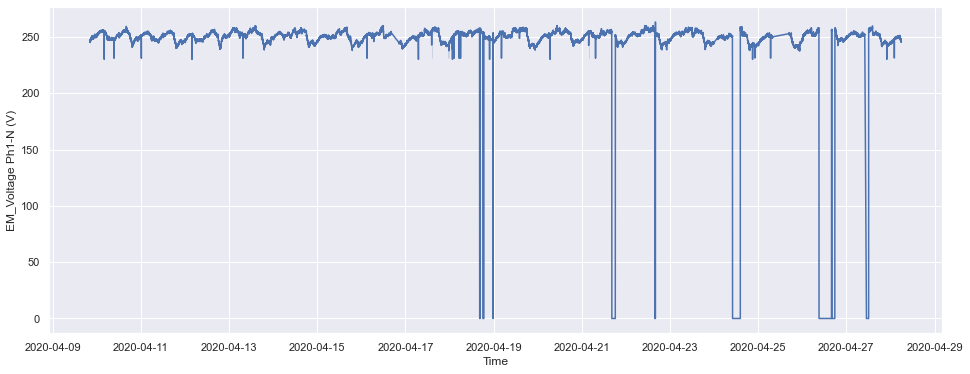

In [42]:

sns.set(style="darkgrid")

plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(x="Time", y="EM_Voltage Ph1-N (V)",
             data=df)

In [50]:
df1=df[(df['Time'] >= '2020-04-27 00:00:00') & (df['Time'] < '2020-04-28 00:00:00') ]

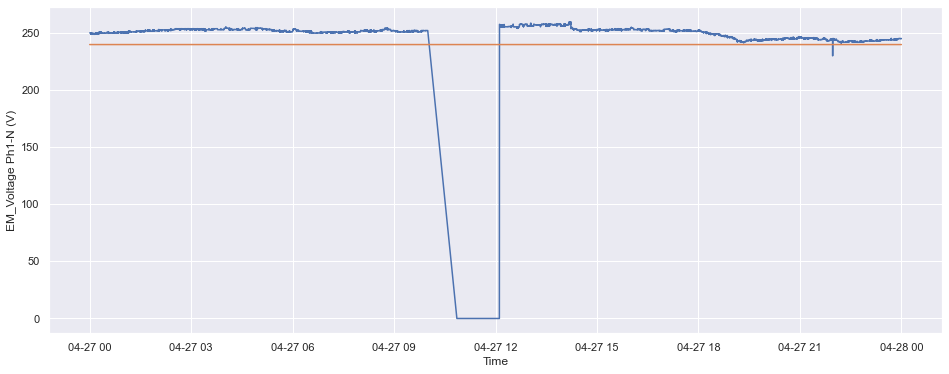

In [82]:
sns.set(style="darkgrid")

plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(x="Time", y="EM_Voltage Ph1-N (V)",
             data=df1)
sns.lineplot(x="Time",y=240,data=df1)

In [116]:
df1['flag']=np.where(df1['EM_Voltage Ph1-N (V)'] > 240,1,0)
df1

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Time,EM_Voltage Ph1-N (V),EM_Current Ph1 (A),EM_Energy (kWh),EM_id,flag
9326,2020-04-27 23:59:59,245.2,178.9,200.39 K,1,1
9327,2020-04-27 23:59:57,245.2,176.9,200.02 K,1,1
9328,2020-04-27 23:59:55,245.2,178.8,200.39 K,1,1
9329,2020-04-27 23:59:53,245.2,174.9,200.35 K,1,1
9330,2020-04-27 23:59:51,245.2,160.9,200.50 K,1,1
...,...,...,...,...,...,...
45942,2020-04-27 00:00:10,250.2,151.8,198.49 K,1,1
45943,2020-04-27 00:00:06,250.2,151.7,198.36 K,1,1
45944,2020-04-27 00:00:04,250.2,150.7,198.31 K,1,1
45945,2020-04-27 00:00:02,250.2,151.7,198.59 K,1,1


In [ ]:
final_df['time_check']=df1.groupby('mt_id')['time'].agg(lambda x: (x.iloc[-1] - x.iloc[0]))

In [121]:
df1['flag'].eq(1).cumsum().where(df1['flag'].ne(0))

9326         1.0
9327         2.0
9328         3.0
9329         4.0
9330         5.0
          ...   
45942    34608.0
45943    34609.0
45944    34610.0
45945    34611.0
45946    34612.0
Name: flag, Length: 36621, dtype: float64

In [124]:
df1['flag'].index[df1['flag'].index.duplicated()].unique()

Int64Index([], dtype='int64')

In [142]:
df1.reset_index()
t=df1.loc[0,'Time']
sum1=0
l1=[]
for i in range(0,len(df1)):
    if(df1.loc[i,'flag']==1):
        sum1=sum1+abs((df1.loc[i,'Time']-t).total_seconds())
        t=df1.loc[i,'Time']
    else:
        l1.append(sum1)
        sum1=0
        print("yes")
        t=df1.loc[i,'Time']
l1.append(sum1)
  

In [143]:
abs(sum)*0.000277778

10.854453128000001

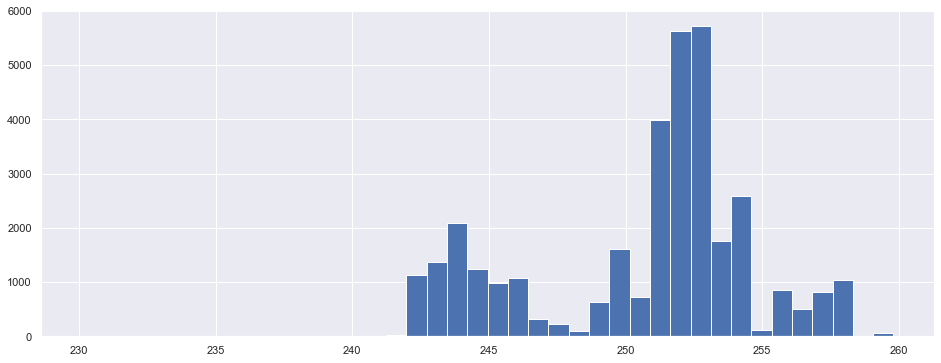

In [119]:
plt.figure(figsize=(16, 6)) 
plt.hist(df1[df1['EM_Voltage Ph1-N (V)']>0]['EM_Voltage Ph1-N (V)'],bins=40)
plt.show()

In [75]:
print("values lying between 75 percentile and max ",len((df1['EM_Voltage Ph1-N (V)'] > np.percentile(df1['EM_Voltage Ph1-N (V)'], 75)) & 
      (df1['EM_Voltage Ph1-N (V)'] >= max(df1['EM_Voltage Ph1-N (V)']))))


values lying between 75 percentile and max  36621


In [71]:
df1.describe()

,EM_Voltage Ph1-N (V),EM_Current Ph1 (A),EM_id
count,36621.000000,36621.000000,36621.0
mean,236.953316,169.214464,1.0
std,57.211513,53.163107,0.0
min,0.000000,0.000000,1.0
25%,245.800000,154.300000,1.0
50%,251.800000,183.100000,1.0
75%,253.000000,202.500000,1.0
max,259.800000,274.700000,1.0


In [111]:
### Value more than threshold
len(df1[df1['EM_Voltage Ph1-N (V)'] > 240])
#out_of_bound=df1.loc[df1['EM_Voltage Ph1-N (V)'] > 240]

34612

In [79]:
### Value more than 75%ile
len(df1[df1['EM_Voltage Ph1-N (V)'] > np.percentile(df1['EM_Voltage Ph1-N (V)'], 75)])

9083

In [112]:
abs(out_of_bound['Time'].diff(periods=1).dt.total_seconds().sum())

86399.0

In [80]:
time_interval=[]
t=df1[0]['Time']
for i in range(0,len(df1)-1):
    if(df1['EM_Voltage Ph1-N (V)'] > 240):
        t=df1[i]['Time']        
        time_duration=df[i]['time']-t
        

KeyError: 0

In [43]:
np.mean(df.iloc[:10,2])

198.7

In [44]:
######### Sliding Window ##############
slides=2
a_list=[]
z=0
window=5
for i in range(0,len(df['EM_Voltage Ph1-N (V)']),1):
        a_list.append(np.mean(df['EM_Voltage Ph1-N (V)'][z:z+5].values))
        #print(z,z+5)
        z=z+5-slides-1

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


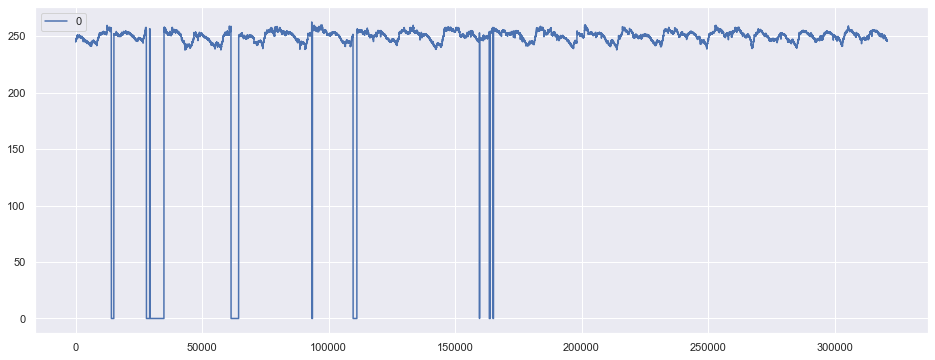

In [45]:
a_list=pd.DataFrame(a_list)
sns.set(style="darkgrid")

plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(data=a_list)

In [46]:
a_list.describe()

,0
count,320871.000000
mean,240.013289
std,50.069781
min,0.000000
25%,246.860000
50%,250.900000
75%,253.540000
max,262.820000


In [47]:
df['EM_Voltage Ph1-N (V)'].count()

641742

In [48]:
min(df['Time'])

Timestamp('2020-04-09 20:07:42')

In [49]:
max(df['Time'])

Timestamp('2020-04-28 05:54:27')